In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:/Users/NTC/Downloads/Data Tasks (1)/tasks/task_1/calls_task.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()

,ACTION_DATE,ACTION_ID,MEMBER_ID,ACTION_TYPE
0,2022-04-10T01:57:30Z,89821691,116778534.0,show_number
1,2022-04-10T02:08:47Z,89915585,110472624.0,show_number
2,2022-04-10T02:31:42Z,90099017,6961446.0,show_number
3,2022-04-05T16:46:39Z,43538787,107681746.0,show_number
4,2022-04-05T17:03:33Z,43670683,108485886.0,show_number


In [5]:
data.tail()

,ACTION_ID,MEMBER_ID,ACTION_TYPE
ACTION_DATE,,,
2022-04-14 18:59:46+00:00,137134739,118280514.0,show_number
2022-04-14 19:00:08+00:00,137137555,118280514.0,show_number
2022-04-19 13:57:25+00:00,187460783,118579286.0,show_number
2022-04-24 16:34:48+00:00,242643555,118821126.0,show_number
2022-04-29 20:26:06+00:00,296794047,67680072.0,show_number


In [6]:
data.describe()

,ACTION_ID,MEMBER_ID
count,4.967280e+05,4.962520e+05
mean,1.453999e+08,9.632383e+07
std,7.127076e+07,3.532784e+07
min,1.018500e+04,1.254000e+03
25%,1.124607e+08,9.989845e+07
50%,1.387663e+08,1.131582e+08
75%,1.915923e+08,1.182805e+08
max,3.081690e+08,1.190928e+08


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496728 entries, 2022-04-10 01:57:30+00:00 to 2022-04-29 20:26:06+00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ACTION_ID    496728 non-null  int64  
 1   MEMBER_ID    496252 non-null  float64
 2   ACTION_TYPE  496728 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 15.2+ MB


In [9]:
data.isna().sum()

ACTION_ID        0
MEMBER_ID      476
ACTION_TYPE      0
dtype: int64

In [10]:
data.isnull().mean()*100

ACTION_ID      0.000000
MEMBER_ID      0.095827
ACTION_TYPE    0.000000
dtype: float64

Daily Patterns

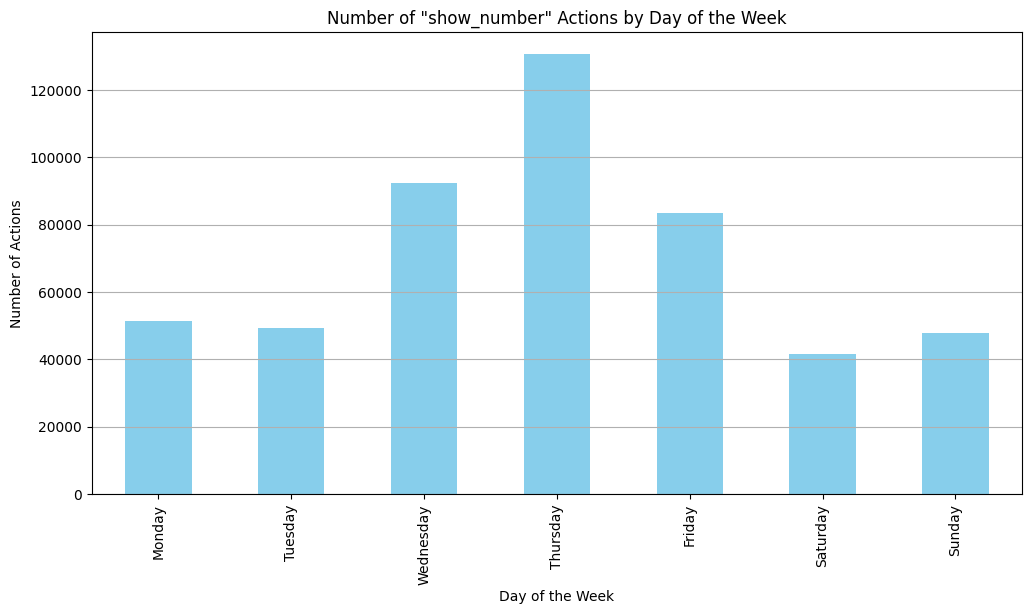

In [11]:
# Extract the day of the week
data['day_of_week'] = data.index.dayofweek

# Map day of week to a readable format
day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                   3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['day_of_week'] = data['day_of_week'].map(day_of_week_map)

# Group by day of the week and count actions
actions_by_day = data.groupby('day_of_week').count()['ACTION_ID']

# Reorder the days of the week
actions_by_day = actions_by_day.loc[[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Plot the actions by day of the week
plt.figure(figsize=(12, 6))
actions_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of "show_number" Actions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Actions')
plt.grid(axis='y')
plt.show()

Hourly Patterns

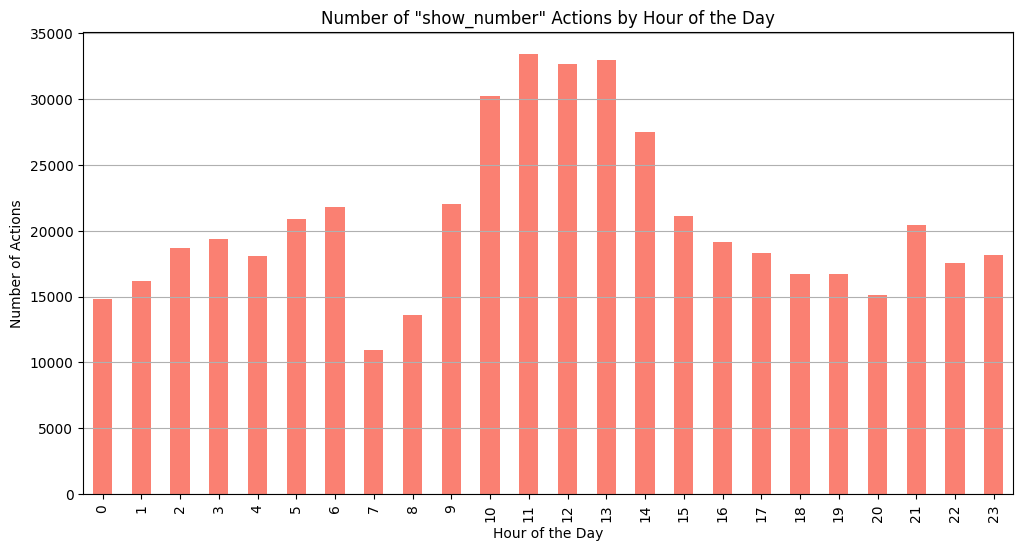

In [12]:
# Extract the hour of the day
data['hour_of_day'] = data.index.hour

# Group by hour of the day and count actions
actions_by_hour = data.groupby('hour_of_day').count()['ACTION_ID']

# Plot the actions by hour of the day
plt.figure(figsize=(12, 6))
actions_by_hour.plot(kind='bar', color='salmon')
plt.title('Number of "show_number" Actions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Actions')
plt.grid(axis='y')
plt.show()

Peak Analysis

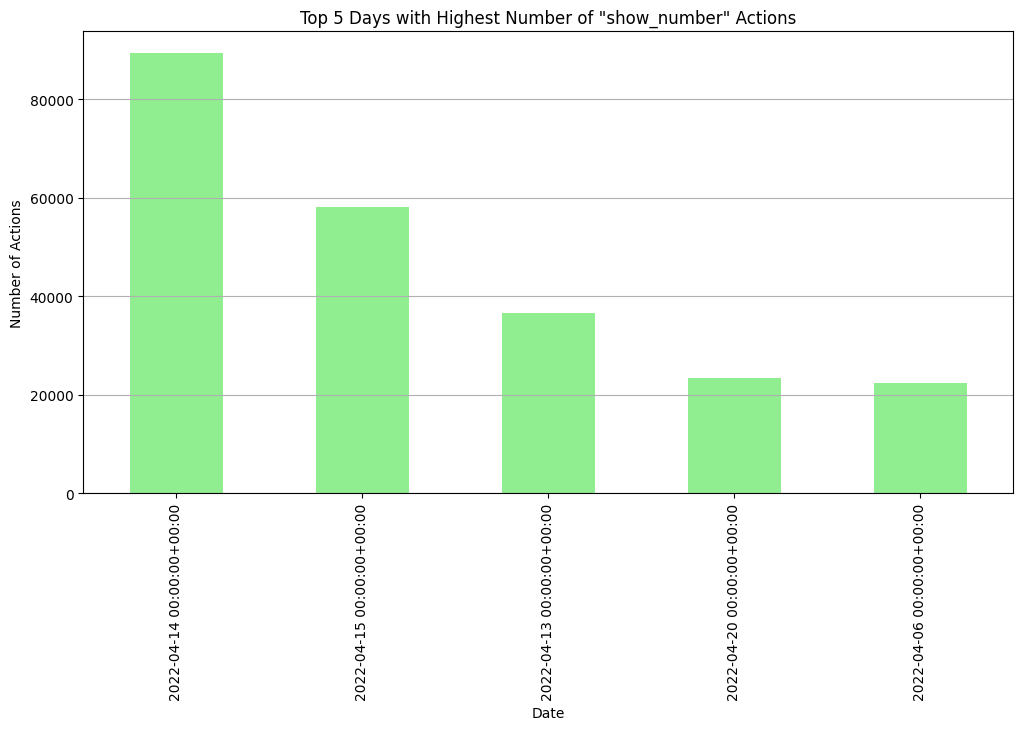

In [13]:
# Find the top 5 days with the highest number of actions
top_days = daily_actions.nlargest(5)

# Plot the top days with the highest number of actions
plt.figure(figsize=(12, 6))
top_days.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Days with Highest Number of "show_number" Actions')
plt.xlabel('Date')
plt.ylabel('Number of Actions')
plt.grid(axis='y')
plt.show()

Trend Analysis

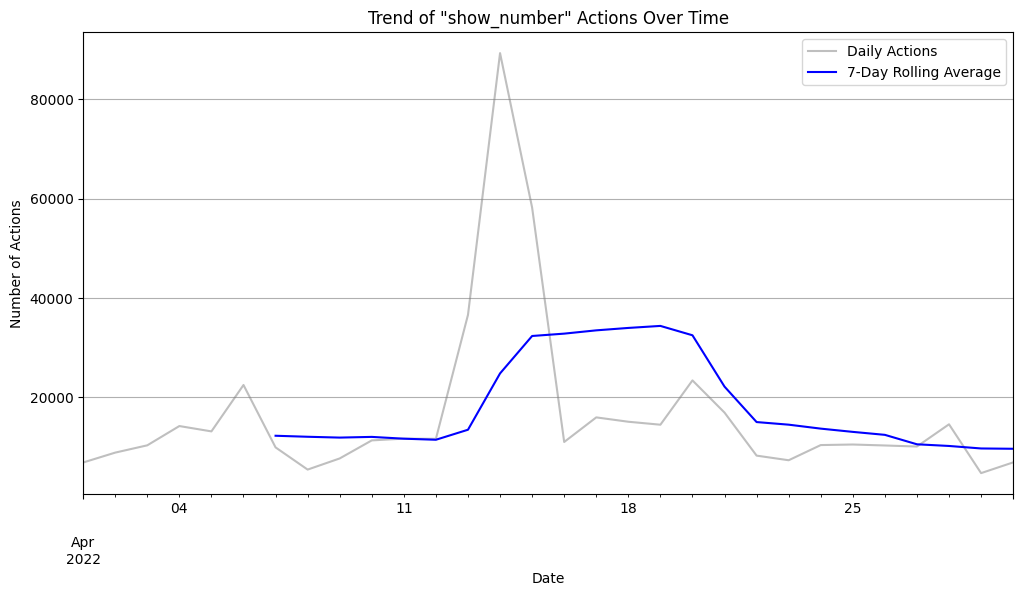

In [14]:
# Plot the trend of actions over time with a rolling average
plt.figure(figsize=(12, 6))
daily_actions.plot(label='Daily Actions', color='grey', alpha=0.5)
daily_actions.rolling(window=7).mean().plot(
    label='7-Day Rolling Average', color='blue')
plt.title('Trend of "show_number" Actions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Actions')
plt.legend()
plt.grid(True)
plt.show()

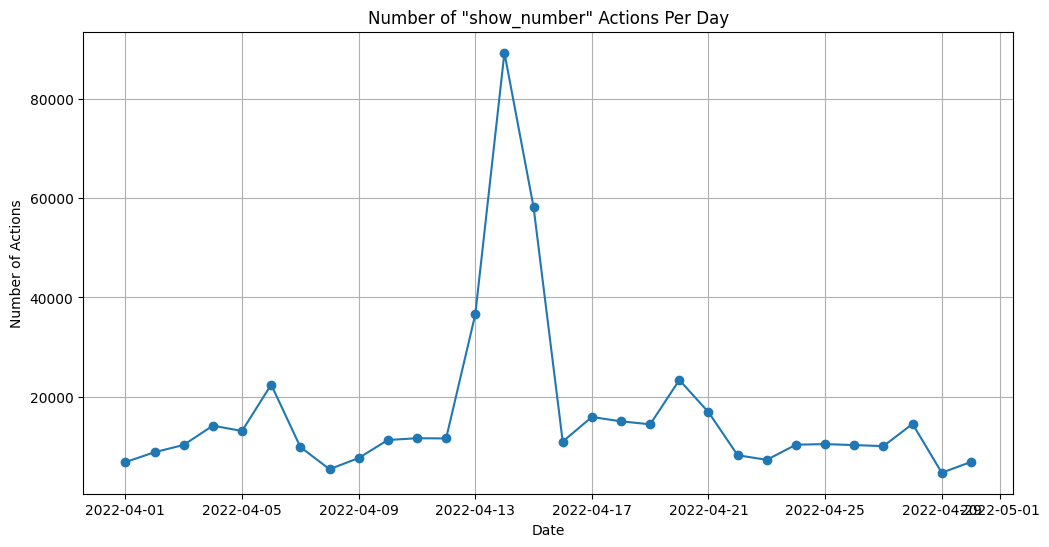

In [4]:
# Convert ACTION_DATE to datetime
data['ACTION_DATE'] = pd.to_datetime(data['ACTION_DATE'])

# Set ACTION_DATE as the index
data.set_index('ACTION_DATE', inplace=True)

# Resample the data by day and count the number of actions per day
daily_actions = data.resample('D').count()['ACTION_ID']

# Plot the number of actions per day
plt.figure(figsize=(12, 6))
plt.plot(daily_actions, marker='o', linestyle='-')
plt.title('Number of "show_number" Actions Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Actions')
plt.grid(True)
plt.show()

1. Explanation with a Graph
The graph above shows the number of "show_number" actions per day throughout the month. We can observe some variations in the number of actions, including peaks and troughs.

2. Potential Causes of the Problem
Several potential causes for variations in the number of "show_number" actions could include:

Seasonal Patterns: Certain days of the week or specific dates might have higher activity due to user behavior.
Technical Issues: Server downtime or technical glitches could cause a drop in the number of actions.
Marketing Campaigns: Promotions or marketing efforts could lead to spikes in user activity.
User Engagement: Changes in user engagement levels, possibly influenced by external factors like holidays or events.

3. Suggestions to Mitigate It in the Future
To address and mitigate issues related to variations in the number of "show_number" actions:

Monitoring and Alerts:

Implement real-time monitoring and alerting systems to detect unusual spikes or drops in activity immediately.
Analyze User Behavior:

Conduct a deeper analysis of user behavior patterns to identify common trends and predict future activity levels.
Technical Improvements:

Ensure robust server infrastructure and redundancy to minimize downtime and handle high traffic smoothly.
Marketing Insights:

Coordinate marketing efforts with data analytics to predict and manage user activity spikes effectively.
Regular Audits:

Perform regular audits of the system to identify and rectify any potential technical issues promptly.